In [37]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import KBinsDiscretizer, LabelEncoder

# Create the dataset
data = {
    "S. No": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [25, 30, 35, 28, 45, 27, 23, 40, 22, 38],
    "Salary": [50000, np.nan, 75000, 60000, 100000, 200000, 40000, np.nan, 35000, 120000],
    "City": ["New York", "Los Angeles", np.nan, "Chicago", "Houston", "New York", "Los Angeles", "Houston", "Chicago", "Los Angeles"],
    "Purchased": ["Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes"]
}
df = pd. DataFrame(data)

# 1. Attribute Selection (Retain only 'Age', 'Salary', and 'Purchased')
df_selected = df[['Age', 'Salary', 'Purchased']].copy()


# 2. Handling Missing Values (Fill 'Salary' with mean and drop missing rows in 'City')
df_selected.loc[:,'Salary']=df_selected['Salary'].fillna(df_selected['Salary']. mean ())

# 3. Discretization (Bin 'Age' into 3 categories: Young, Mid, Senior)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform',subsample=None)
df_selected['Age Group'] = discretizer.fit_transform(df_selected[['Age']])

# 4. Elimination of Outliers (Remove outliers in 'Salary' using IQR)
Q1 = df_selected['Salary'].quantile(0.25)
Q3 = df_selected['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_cleaned = df_selected[(df_selected['Salary'] >= lower_limit) & (df_selected['Salary'] <= upper_limit)]

# Final dataset
print ("Final Preprocessed Dataset:\n", df_cleaned)







Final Preprocessed Dataset:
    Age    Salary Purchased  Age Group
0   25   50000.0       Yes        0.0
1   30   85000.0        No        1.0
2   35   75000.0       Yes        1.0
3   28   60000.0       Yes        0.0
4   45  100000.0        No        2.0
6   23   40000.0        No        0.0
7   40   85000.0       Yes        2.0
8   22   35000.0        No        0.0
9   38  120000.0       Yes        2.0


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Data
data = {
    "S. No": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Experience": [1, 3, 5, 2, 10, 4, 0, 8, 1, 6],
    "Age": [25, 30, 35, 28, 45, 27, 23, 40, 22, 38],
    "Salary": [50000, 60000, 75000, 58000, 100000, 95000, 40000, 85000, 37000, 120000],
    "Purchased": ["Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes"]
}
df = pd.DataFrame(data)

# Encode "Purchased" column
le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])

# Features and target
X = df[['Experience', 'Age']]
y_class = df['Purchased']  # Classification target
y_reg = df['Salary']       # Regression target

# Split the data
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=1)
_, _, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=1)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Classifier
knn_class = KNeighborsClassifier(n_neighbors=3)
knn_class.fit(X_train, y_class_train)
y_class_pred = knn_class.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_class_test, y_class_pred))

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_reg_train)
y_reg_pred = knn_reg.predict(X_test)
print("Regression Mean Squared Error:", mean_squared_error(y_reg_test, y_reg_pred))


Classification Accuracy: 0.3333333333333333
Regression Mean Squared Error: 521296296.2962962


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Data
data = {
"ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
"Education_Level": ["High School", "Bachelor's", "Master's", "High School", "PhD",
"Bachelor's", "Master's", "PhD", "High School", "Bachelor's"],
"Work_Experience": [2, 5, 8, 1, 15, 4, 6, 10, 0, 7],
"Age": [22, 25, 30, 21, 45, 26, 29, 40, 20, 35],
"Hired": ["No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}
df = pd.DataFrame(data)

# Encode categorical columns
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Hired'] = le.fit_transform(df['Hired'])

6

# Features and target
X = df[['Education_Level', 'Work_Experience', 'Age']]
y = df['Hired']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree Classifier with Grid Search for Parameter Tuning
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [3, 5, 7, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=3,
scoring='accuracy') # Reduced cv to 3
grid_search.fit(X_train, y_train)

# Best parameters and classifier
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_classifier = grid_search.best_estimator_

7

# Evaluate the optimized model
y_pred = best_classifier.predict(X_test)
print("Optimized Classification Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Classification Accuracy: 0.6666666666666666


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn. model_selection import train_test_split, GridSearchCV
from sklearn. tree import DecisionTreeClassifier
from sklearn. metrics import accuracy_score
from sklearn. preprocessing import LabelEncoder

# Define the dataset
data = {
"ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120],
"Education_Level": [
"High School", "Bachelor's", "Master's", "High School", "PhD", "Bachelor's", "Master's",
"PhD",
"High School", "Bachelor's", "Master's", "PhD", "High School", "Master's", "PhD",
"Bachelor's",
"High School", "PhD", "Bachelor's", "Master's"
],
"Work_Experience": [2, 5, 8, 1, 15, 4, 6, 10, 0, 7, 12, 3, 9, 14, 11, 5, 7, 6, 2, 4],
"Age": [22, 25, 30, 21, 45, 26, 29, 40, 20, 35, 32, 28, 34, 42, 39, 27, 31, 37, 33, 38],
"Hired": ["No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes",
"No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}

4

# Create a DataFrame
df = pd. DataFrame(data)

# Encode categorical columns
le = LabelEncoder ()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Hired'] = le.fit_transform(df['Hired'])
# Features and target
X = df[['Education_Level', 'Work_Experience', 'Age']]
y = df['Hired']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [3, 5, 7, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with DecisionTreeClassifier
grid_search = GridSearchCV (DecisionTreeClassifier(random_state=1), param_grid, cv=5,
scoring='accuracy')

5

# Fit the model with training data
grid_search.fit (X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search. best_params_
print ("Best Parameters:", best_params)

# Get the best classifier from the grid search
best_classifier = grid_search. best_estimator_

# Predict on the test set
y_pred = best_classifier. predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score (y_test, y_pred)
print ("Optimized Classification Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Classification Accuracy: 0.6666666666666666


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Define the dataset
data = {
"ID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
118, 119, 120],
"Education_Level": [
"High School", "Bachelor's", "Master's", "High School", "PhD", "Bachelor's",
"Master's", "PhD",
"High School", "Bachelor's", "Master's", "PhD", "High School", "Master's", "PhD",
"Bachelor's",
"High School", "PhD", "Bachelor's", "Master's"
],
"Work_Experience": [2, 5, 8, 1, 15, 4, 6, 10, 0, 7, 12, 3, 9, 14, 11, 5, 7, 6, 2, 4],
"Age": [22, 25, 30, 21, 45, 26, 29, 40, 20, 35, 32, 28, 34, 42, 39, 27, 31, 37, 33, 38],
"Hired": ["No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No",
"Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode categorical columns
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Hired'] = le.fit_transform(df['Hired'])

# Features and target for classification (Random Forest Classifier)
X_classification = df[['Education_Level', 'Work_Experience', 'Age']]
y_classification = df['Hired']

# Split the data into training and test sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification,
y_classification, test_size=0.3, random_state=1)

# Apply Random Forest Classifier with GridSearchCV for parameter tuning
param_grid_class = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 5, 10],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 2]
}

grid_search_class = GridSearchCV(RandomForestClassifier(random_state=1),
param_grid_class, cv=5, scoring='accuracy')
grid_search_class.fit(X_train_class, y_train_class)

# Best parameters for classification
best_params_class = grid_search_class.best_params_
print("Best Parameters (Classifier):", best_params_class)

# Best classifier
best_classifier = grid_search_class.best_estimator_

# Evaluate classifier
y_pred_class = best_classifier.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print("Optimized Classification Accuracy:", classification_accuracy)
# Features and target for regression (Random Forest Regressor)
X_regression = df[['Education_Level', 'Work_Experience']]
y_regression = df['Age']

# Split the data into training and test sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression,
y_regression, test_size=0.3, random_state=1)

# Apply Random Forest Regressor with GridSearchCV for parameter tuning

param_grid_reg = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 5, 10],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 2]
}

grid_search_reg = GridSearchCV(RandomForestRegressor(random_state=1),
param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg, y_train_reg)

# Best parameters for regression
best_params_reg = grid_search_reg.best_params_
print("Best Parameters (Regressor):", best_params_reg)

# Best regressor
best_regressor = grid_search_reg.best_estimator_

# Evaluate regressor
y_pred_reg = best_regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error (Regressor):", mse)

Best Parameters (Classifier): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Classification Accuracy: 0.6666666666666666
Best Parameters (Regressor): {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error (Regressor): 25.630466962962966


In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Example dataset
emails = ["Win a free lottery now", "This is a normal email",
"Win a prize for free", "Hello, how are you?"]
labels = [1, 0, 1, 0] # 1 = Spam, 0 = Not Spam

# Convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=42)

# Train Naïve Bayes Model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)
print(y_pred)

[1 1]


Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



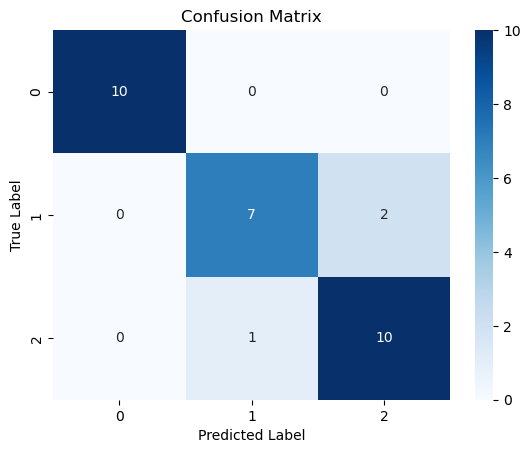

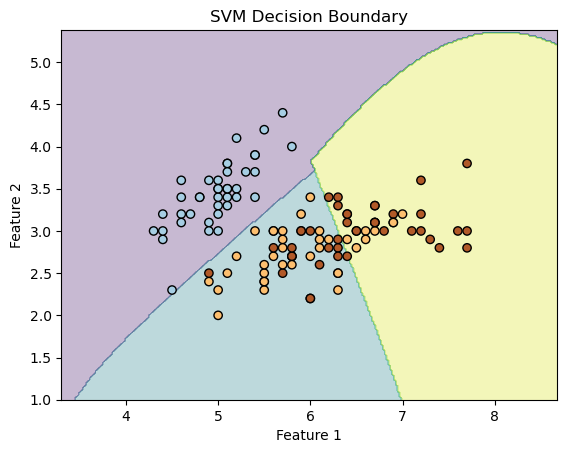

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
# Load dataset 
iris = datasets.load_iris() 
X = iris.data[:, :2] # Using first two features for visualization 
y = iris.target 
# Split dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Train an SVM classifier 
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale') 
svm_model.fit(X_train, y_train)
# Predict on test data 
y_pred = svm_model.predict(X_test) 
# Print accuracy and classification report 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 
# Confusion matrix visualization 
conf_matrix = confusion_matrix(y_test, y_pred) 
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d') 
plt.xlabel('Predicted Label') 
plt.ylabel('True Label') 
plt.title('Confusion Matrix') 
plt.show() 
# Function to plot decision boundary 
def plot_decision_boundary(model, X, y): 
 h = .02 
 x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
 xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  
 Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
 Z = Z.reshape(xx.shape) 
 plt.contourf(xx, yy, Z, alpha=0.3) 
 plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)  
 plt.xlabel('Feature 1') 
 plt.ylabel('Feature 2') 
 plt.title('SVM Decision Boundary') 
 plt.show() 
# Plot decision boundary 
plot_decision_boundary(svm_model, X_train, y_train)


Mean Squared Error: 0.0


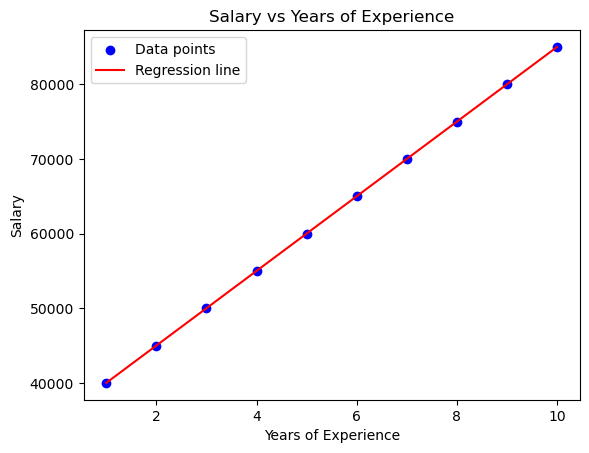

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dataset: Years of Experience vs Salary
data = {
"Years_Experience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
"Salary": [40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Years_Experience']] # Feature: Years of Experience
y = df['Salary'] # Target: Salary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression model

7



linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Predict using the trained model
y_pred = linear_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, linear_regressor.predict(X), color='red', label='Regression line')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

Accuracy: 100.00%
Confusion Matrix:
[[1 0]
 [0 1]]


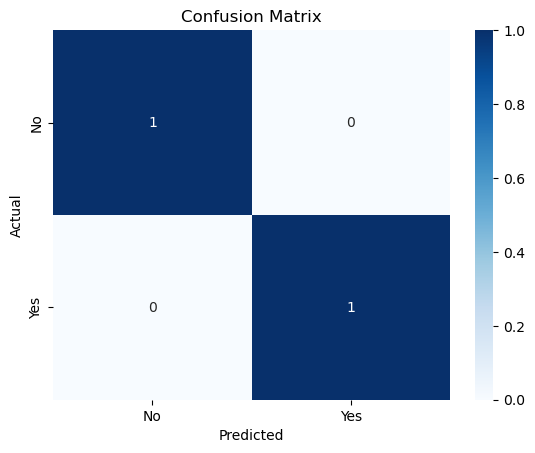

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset: Age, Annual Income, and Purchase (0 = No, 1 = Yes)
data = {
"Age": [22, 25, 27, 30, 35, 40, 45, 50, 55, 60],
"Annual_Income": [30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000],
"Purchased": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # 0 = No, 1 = Yes
}

# Create DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Age', 'Annual_Income']] # Features: Age and Annual Income
y = df['Purchased'] # Target: Purchased (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Plotting Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'],
yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()